# Lab 3: Protein Clustering

## 1 Show the distribution of phi and psi combinations using: 

### a. A scatter plot

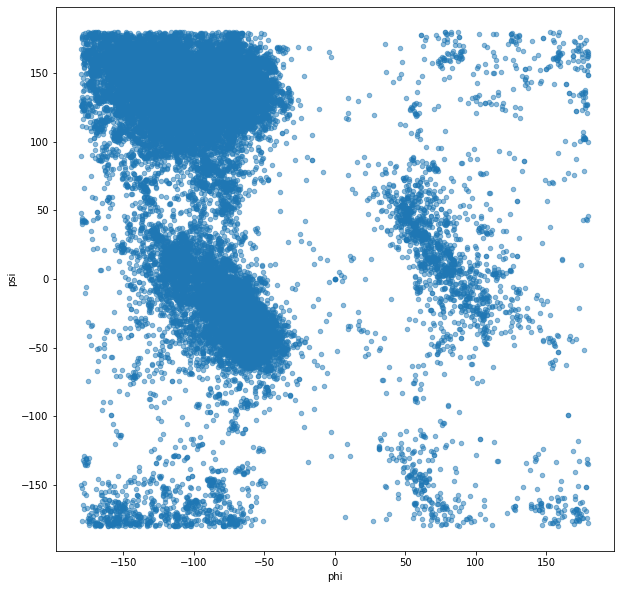

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 10]

data = pd.read_csv("data_all.csv")
data.plot.scatter(x="phi", y="psi", alpha = 0.5)

### b. A heatmap

[-180, -162, -144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]


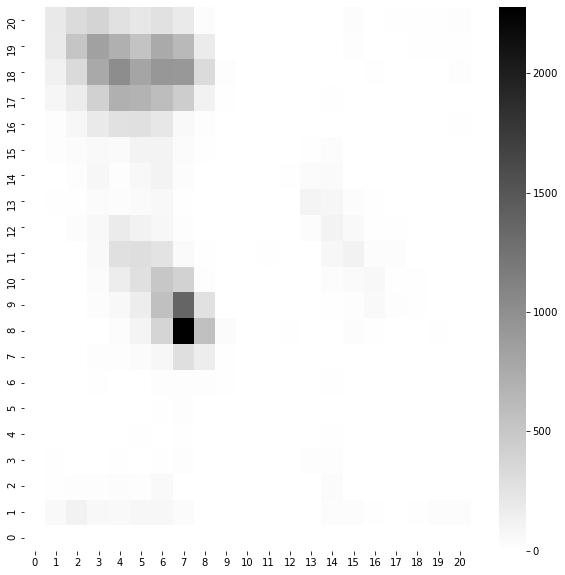

In [85]:
import numpy as np

buckets = 20
breakpoints = range(-180,181, int(360/buckets))
breakpoints_array = []

for x in breakpoints:
    breakpoints_array.append(x)
    
print(breakpoints_array)
hmap = np.zeros((buckets +1, buckets + 1))

for i, row in data.iterrows():
    phiI = 0
    psiI = 0
    for i, bp in enumerate(breakpoints_array):
        if bp > row.psi:
            psiI = i
            break
    
    for i, bp in enumerate(breakpoints_array):
        if bp > row.phi:
            phiI = i
            break
    
    hmap[psiI,phiI] += 1


sns.heatmap(hmap,cmap="gist_yarg")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
def base_round(x, base=5):
    return base * round(x/base)

dataNumbers = data[['phi','psi']].copy()

amount = np.zeros((360,360))
it = 0
for i, row in data.iterrows():
    amount[base_round(row.phi)][base_round(row.psi)] += 1   

sns.heatmap(amount)

## 2 Use  the  K-means  clustering  method to  cluster  the phi  and  psi  angle  combinations  in the data file. 

### a. Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice. 

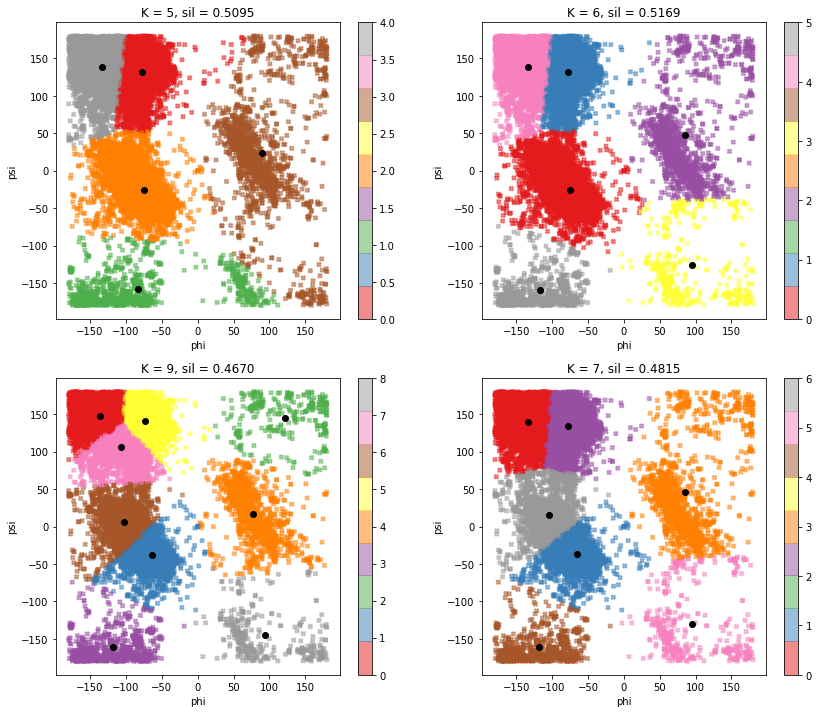

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = [5,6,9,7]

plt.rcParams['figure.figsize'] = [2*7, int(len(ks)/2)*6]
fig,axs = plt.subplots(int(len(ks)/2),2)
axs = axs.flatten()

for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters=k).fit(dataNumbers)
    clusters = kmeans.cluster_centers_
    axs[i].set_title(f"K = {k}, sil = {silhouette_score(dataNumbers, kmeans.labels_):,.4f}")
    data.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], c=kmeans.labels_, cmap="Set1", marker='X')
    axs[i].scatter(x=clusters[:,0], y=clusters[:,1], c="Black")


### b.Validate the clusters that are found with the chosen value of K. Hint: See the slides for Lecture 6, Section Validating clustering. 

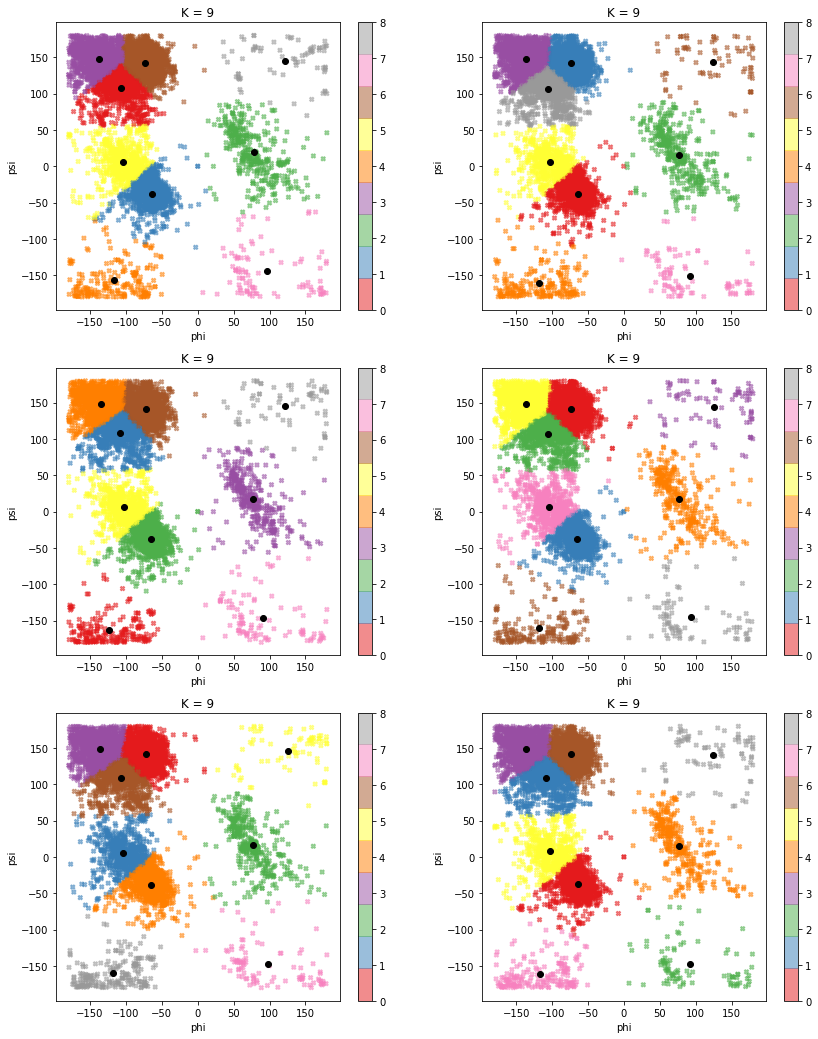

In [4]:
k = 9
iterations = 6

plt.rcParams['figure.figsize'] = [2*7, int(iterations/2)*6]
fig,axs = plt.subplots(int(iterations/2),2)
axs = axs.flatten()


for i in range(iterations):
  sample = data.sample(frac=1/4)
  sampleNumbers = sample[['phi','psi']].copy()

  kmeans = KMeans(n_clusters=k).fit(sampleNumbers)
  clusters = kmeans.cluster_centers_
  axs[i].set_title(f"K = {k}")

  sample.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], c=kmeans.labels_, cmap="Set1", marker='X')
  axs[i].scatter(x=clusters[:,0], y=clusters[:,1], c="Black")
plt.show()

'''
ks = [7,7,7,7]

plt.rcParams['figure.figsize'] = [len(ks)*7, 1*6]
fig,axs = plt.subplots(1,len(ks))

for i,k in enumerate(ks):
  sample = data.sample(frac=1/4)
  sampleNumbers = sample[['phi','psi']].copy()

  kmeans = KMeans(n_clusters=k).fit(sampleNumbers)
  clusters = kmeans.cluster_centers_
  axs[i].set_title(f"K = {k}")

  sample.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], c=kmeans.labels_, cmap="Set1", marker='X')
  axs[i].scatter(x=clusters[:,0], y=clusters[:,1], c="Black")
'''
plt.show()


### c.Do the clusters found in part (a) seem reasonable? 

kinda? like 5% prob to get wrong clusters on K=8

### d. Can you change the data to get better results (or the same results in a simpler way)?  (Hint:  since  both  phi  and  psi  are  periodic  attributes,  you  can  think  of shifting/translating them by some value and then use the modulo operation.) 

Translatera/shifta upp så att clustret längst ner till vänster faktiskt hamnar uppe på det högst upp till vänster etc.

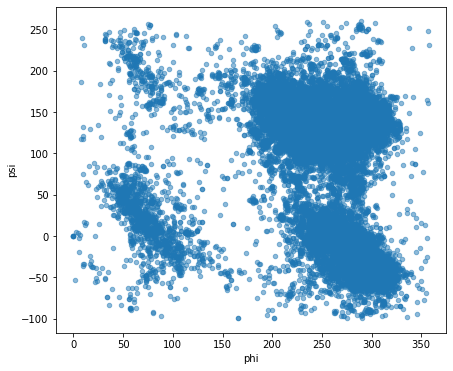

In [5]:
translated = dataNumbers.copy()

plt.rcParams['figure.figsize'] = [1*7, 1*6]

array = translated.psi.to_numpy()

for i,x in enumerate(array):
    if x < -100:
        array[i] = x + 360
translated['psi']= pd.Series(array)

array = translated.phi.to_numpy()

for i,x in enumerate(array):
    if x < 0:
        array[i] = x + 360
        
translated['phi']= pd.Series(array)
translated.plot.scatter(x="phi", y="psi", alpha = 0.5)

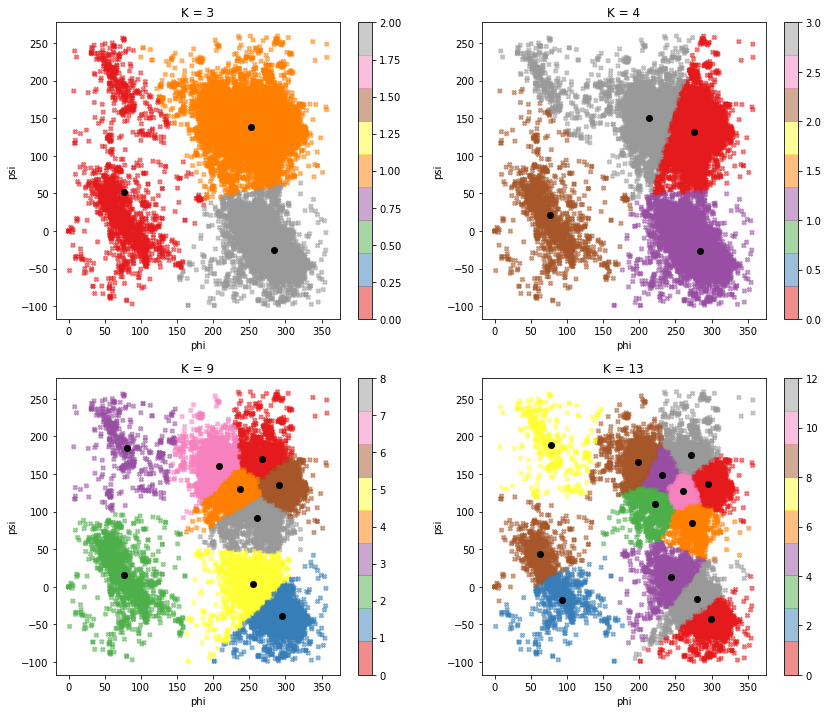

In [6]:
ks = [3,4,9,13]

plt.rcParams['figure.figsize'] = [2*7, int(len(ks)/2)*6]
fig,axs = plt.subplots(int(len(ks)/2),2)
axs = axs.flatten()

for i,k in enumerate(ks):
  kmeans = KMeans(n_clusters=k).fit(translated)
  clusters = kmeans.cluster_centers_
  axs[i].set_title(f"K = {k}")
  translated.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], c=kmeans.labels_, cmap="Set1", marker='X')
  axs[i].scatter(x=clusters[:,0], y=clusters[:,1], c="Black")

## 3. Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.

### a. Motivate: 
#### i. the  choice  of the  minimum number  of  samples in  the neighbourhood for a point to be considered as a core point, and 
#### ii.the  choice  of the  maximum distance between two  samples  belonging to the same neighbourhood (“eps” or “epsilon”)

### b. Highlight  the  clusters  found  using  DBSCAN  and  any  outliers  in  a  scatter  plot. How  many  outliers  are  found?  Plot  a  bar  chart  to  show  which  amino  acid residue types are most frequently outliers

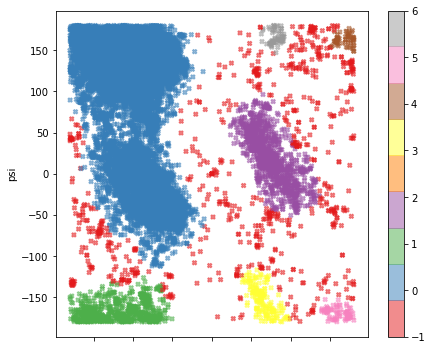

In [7]:
from sklearn.cluster import DBSCAN

plt.rcParams['figure.figsize'] = [1*7, 1*6]

dbcluster = DBSCAN(eps=15, min_samples=45).fit(dataNumbers)

data.plot.scatter(x="phi", y="psi", alpha = 0.5, c=dbcluster.labels_, cmap="Set1", marker='X')

### c. Compare the clusters found by DBSCAN with those found using K-means

finds fewer clusters. Doesn't split clusters as much

### d. Discuss whether the clusters found using DBSCAN are robust to small changes in  the  minimum  number  of  samples  in  the  neighbourhood  for  a  point  to  be considered  as  a  core  point,  and/or  the  choice  of  the  maximum  distance between   two   samples   belonging   to   the   same   neighbourhood   (“eps”   or “epsilon”)

It's volatile

## 4. The data file can be stratified by amino acid residue type.  

### a. Use  DBSCAN to cluster the data that have residue type  PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3).

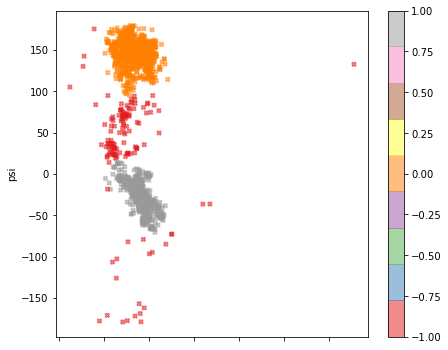

In [8]:
proData = data[data["residue name"] == "PRO"]
proDataNumbers = proData[['phi','psi']].copy()

plt.rcParams['figure.figsize'] = [1*7, 1*6]

dbcluster2 = DBSCAN(eps=15, min_samples=50).fit(proDataNumbers)

proData.plot.scatter(x="phi", y="psi", alpha = 0.5, c=dbcluster2.labels_, cmap="Set1", marker='X')

### b. Now use DBSCAN to cluster the data that have residue type GLY. Investigate how the clusters found for amino acid residues of type GLY differ from the general clusters. 


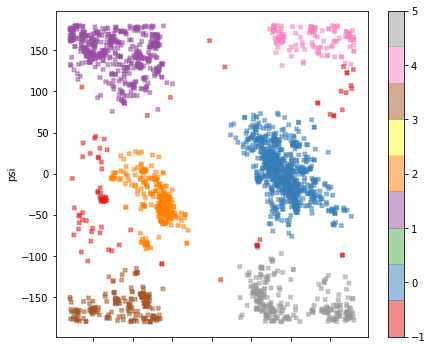

In [9]:
glyData = data[data["residue name"] == "GLY"]
glyDataNumbers = glyData[['phi','psi']].copy()

plt.rcParams['figure.figsize'] = [1*7, 1*6]

dbcluster3 = DBSCAN(eps=25, min_samples=30).fit(glyDataNumbers)

glyData.plot.scatter(x="phi", y="psi", alpha = 0.5, c=dbcluster3.labels_, cmap="Set1", marker='X')
plt.show()